## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets

np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

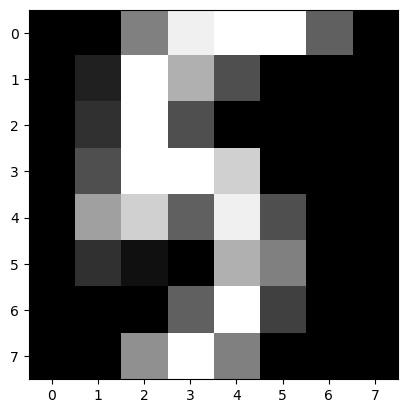

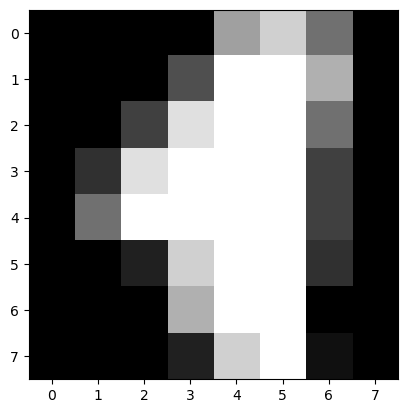

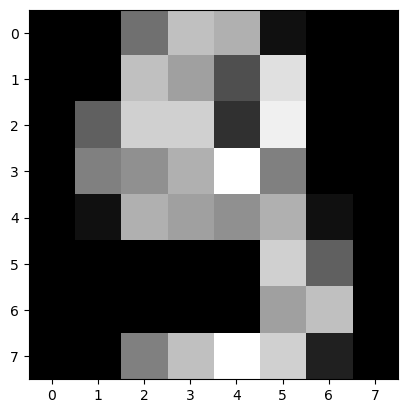

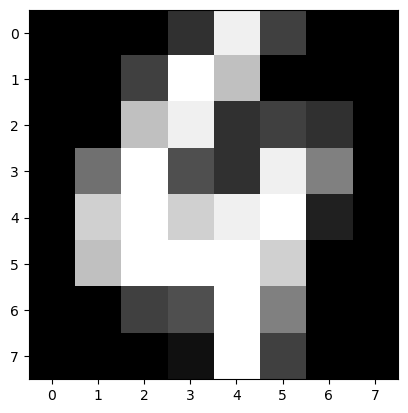

In [8]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

# MLPClassifier

For more details, see here (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for more information on available parameters.

MLP Classifier will use the given solver to identify the combinations of model parameters that result in the lowest value in the cost function. The loss function is log-loss, and the possible solvers that can be used to find this minimum of this log-loss function are adam, sgd, lbfgs (see here for more information/intuition behind log-loss cost function). 

lbfgs -  Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm (https://en.wikipedia.org/wiki/Limited-memory_BFGS)
sgd - Stochastic gradient descent (https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
adam - Adaptive moment estimation (https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)

Notice that the algorithm does not find the highest accuracy, f1, precision, or recall. It considers only the set of in-model parameters (in the case of MLPClassifier, these are the weights and biases). Note that these model parameters are different from hyper-parameters (hyper-parameters are outside the inner model weights and biases)


In [10]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)

# Currently (version 1.2.2), MLPClassifier supports only the Cross-Entropy loss function.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Iteration 1, loss = 6.96166799
Validation score: 0.173611
Iteration 2, loss = 3.38682960
Validation score: 0.250000
Iteration 3, loss = 2.30535931
Validation score: 0.284722
Iteration 4, loss = 1.73830960
Validation score: 0.430556
Iteration 5, loss = 1.40844348
Validation score: 0.569444
Iteration 6, loss = 1.17545814
Validation score: 0.708333
Iteration 7, loss = 0.98965136
Validation score: 0.763889
Iteration 8, loss = 0.82947809
Validation score: 0.750000
Iteration 9, loss = 0.69353071
Validation score: 0.798611
Iteration 10, loss = 0.58298952
Validation score: 0.805556
Iteration 11, loss = 0.49723029
Validation score: 0.805556
Iteration 12, loss = 0.42474694
Validation score: 0.826389
Iteration 13, loss = 0.36798193
Validation score: 0.840278
Iteration 14, loss = 0.32322252
Validation score: 0.875000
Iteration 15, loss = 0.28564721
Validation score: 0.875000
Iteration 16, loss = 0.25239497
Validation score: 0.888889
Iteration 17, loss = 0.22596617
Validation score: 0.895833
Iterat

In [11]:
model1.loss_curve_

[6.961667990865341,
 3.386829602379183,
 2.3053593127006593,
 1.7383095952821688,
 1.4084434760790059,
 1.175458140403809,
 0.9896513593485391,
 0.8294780873440036,
 0.6935307065211131,
 0.5829895169406843,
 0.4972302873163056,
 0.4247469422171258,
 0.36798192626363646,
 0.32322251869897534,
 0.28564721046055414,
 0.2523949667957054,
 0.22596616547460666,
 0.20306055295942574,
 0.1817015575612553,
 0.1643464102116941,
 0.1462406644241717,
 0.13161516821288938,
 0.1190601030582292,
 0.10857149370578444,
 0.09847435255683343,
 0.0900063900518758,
 0.0814164166536714,
 0.0747721215039647,
 0.06785189030290671,
 0.06369072635624748,
 0.05718873895628749]

In [12]:
%%time
y_pred = model1.predict(X_test)

CPU times: user 17.4 ms, sys: 1.9 ms, total: 19.3 ms
Wall time: 3.39 ms


In [13]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9535    0.9762        43
           1     0.9706    0.9429    0.9565        35
           2     0.9722    0.9722    0.9722        36
           3     0.9750    0.9512    0.9630        41
           4     0.9250    0.9737    0.9487        38
           5     0.9286    0.8667    0.8966        30
           6     1.0000    1.0000    1.0000        37
           7     0.9714    0.9189    0.9444        37
           8     0.8182    0.9310    0.8710        29
           9     0.8611    0.9118    0.8857        34

    accuracy                         0.9444       360
   macro avg     0.9422    0.9422    0.9414       360
weighted avg     0.9469    0.9444    0.9450       360



In [14]:
y_pred = model1.predict(X_test)
y_pred

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 9, 5, 2, 1, 7, 0, 5, 8,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 1, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       8, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 9, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 8, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 9, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 8, 5, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 4, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 7, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 8, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

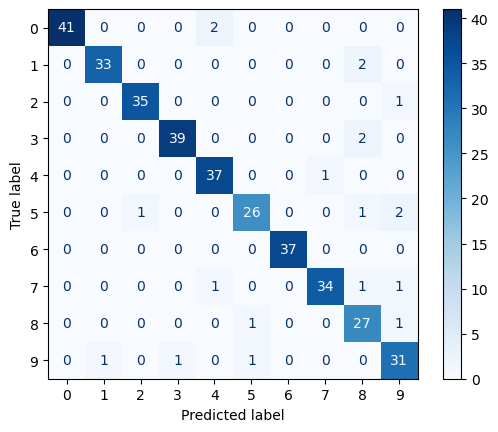

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## With RandomizedSearchCV

With Randomized and Grid search functions, we attempt to identify the model hyper-parameters that yield the optimal score value. For instance, if given accuracy, RandomizedSearchCV will:
1. Sample from the parameter distribution.
2. Fit the model (which involves the solver identifying the lowest log-loss).
3. Calculate the score for that model.

In the code below, note that ```scoring='accuracy'```, therefore, RandomizedSearchCV will identify the 'best' model as the one that achived the highest accuracy score. Other scoring metrics include f1, precision, recall, etc. (see here for a complete list).

In [16]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='accuracy', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
CPU times: user 15 s, sys: 888 ms, total: 15.9 s
Wall time: 25.5 s


In [17]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'tol': 5e-05, 'solver': 'adam', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (128, 64), 'early_stopping': True, 'batch_size': 50, 'alpha': 0.0005, 'activation': 'logistic'}


In [18]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    0.9722    0.9859        36
           3     0.9762    1.0000    0.9880        41
           4     0.9487    0.9737    0.9610        38
           5     0.9355    0.9667    0.9508        30
           6     1.0000    1.0000    1.0000        37
           7     0.9714    0.9189    0.9444        37
           8     0.9655    0.9655    0.9655        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9750       360
   macro avg     0.9740    0.9744    0.9740       360
weighted avg     0.9754    0.9750    0.9750       360

CPU times: user 14.3 ms, sys: 1.45 ms, total: 15.8 ms
Wall time: 5.23 ms


In [19]:
y_pred = model2.predict(X_test)
y_pred

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 9, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 8, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 5, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 7, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 3, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

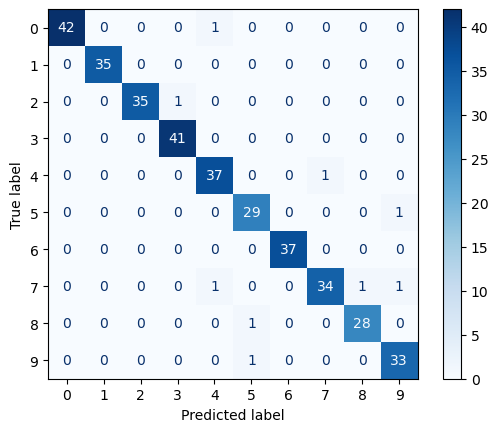

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()